In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
train_data = pd.read_csv('/content/Titanic_train.csv')

In [3]:
# Data Preprocessing
# Handle missing values
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to excessive missing values
train_data.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target
X = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = train_data['Survived']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = logreg.predict(X_val)
y_pred_proba = logreg.predict_proba(X_val)[:, 1]

<ipython-input-3-05082d2dd3bc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
<ipython-input-3-05082d2dd3bc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [4]:

# Classification report and metrics
print("Classification Report:")
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred_proba):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.80
ROC AUC: 0.85


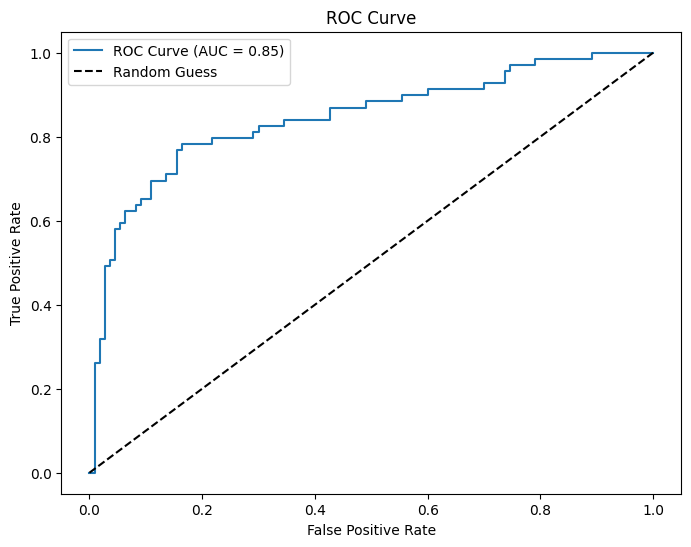

In [5]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_val, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [6]:
# Interpretation of coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("Logistic Regression Coefficients:")
print(coefficients)

Logistic Regression Coefficients:
      Feature  Coefficient
6  Embarked_Q     0.302578
4        Fare     0.002218
1         Age    -0.039212
3       Parch    -0.074177
2       SibSp    -0.246328
7  Embarked_S    -0.389035
0      Pclass    -1.094308
5    Sex_male    -2.557302
